<a href="https://colab.research.google.com/github/luisedu96/TransmisionGuiada/blob/master/Actividades/Parametros_lineas_transmision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implementar un libro en Jupyter que sirva como calculador de parámetros en una línea de transmisión.** 
Para esto, los parámetros de entrada son:
1. Transmisor:
 * Voltaje.
 * Frecuencia.
 * Impedancia de salida.
2. Impedancia de la carga:
3. Línea de transmisión:
 * Longitud.
 * Impedancia característica.
 * Coeficiente de atenuación.
 * Permitividad relativa del dieléctrico.

En el libro se debe graficar:
1. La señal de voltaje incidente y reflejada en la carga en función de la distancia.
2. La potencia promedio en función de la distancia.
3. La onda estacionaria en función de la distancia.
4. Imprimir los siguientes valores:
 * Coeficiente de reflexión en la carga.
 * ROET.
 * Potencia transferida a la carga.
 * Potencia reflejada en la carga. 



##**Realizar pruebas con los siguientes valores:**
1. Transmisor:
 * Voltaje 5V
 * Frecuencia 800 MHz
 * Impedancia de salida 2Ω
2. Impedancia de carga 50Ω
3. Línea de transmisión:
 * Longitud 25m
 * Impedancia característica 75Ω
 * Atenuación 0.001 [1/m]
 * Permitividad relativa del dieléctrico 2.2

**Con la permitividad relativa del dieléctrico y la frecuencia se calcula la constante de fase β.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

vg = 5
f = 800e6
zg = 2
zl = 50
l = 25
zo = 75 
alpha = 0.001
er = 2.2
e =  8.8541878176e-12
c = 3e8

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


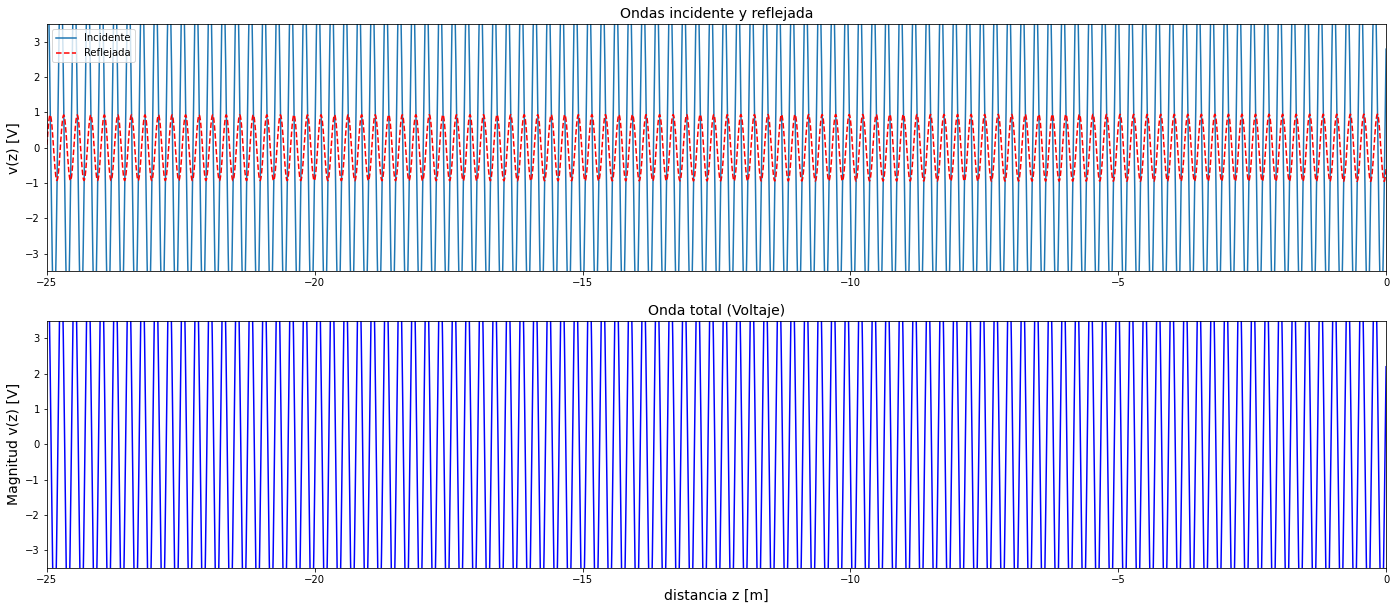

In [5]:
j = complex(0,1)
betha = 2*np.pi*f*np.sqrt(er)/c
gama = alpha + j*betha
Rcoef = (zl-zo)/(zl+zo)

CR_carga = Rcoef
CR_fuente = CR_carga*np.exp(2*gama*-25)
Z_fuente = zo*(1+CR_fuente)/(1-CR_fuente)
V_fuente = vg*(Z_fuente)/(Z_fuente+zg)
Vo_mas = V_fuente/(np.exp(-gama*-25)*(1+CR_fuente))
Vo_menos = Vo_mas*Rcoef

z = np.arange(-l,0,l/50)
vi = Vo_mas*np.exp(-z*gama)
vr = Vo_menos*np.exp(z*gama)

CR_z = CR_carga*np.exp(2*gama*z)
V = (Vo_mas*np.exp(-1*gama*z))*(1+CR_z)

vt = vi+vr
fig, ax = plt.subplots(2, 1, figsize=(24, 10))
ax[0].plot(z, vi, label='Incidente')
ax[0].plot(z, vr, 'r--', label='Reflejada')
ax[0].axis([-l, 0, -3.5, 3.5])
ax[0].set_ylabel('v(z) [V]', fontsize=14)
ax[0].set_title('Ondas incidente y reflejada', fontsize=14)
ax[0].legend()

ax[1].plot(z, V, color='b')
ax[1].axis([-l, 0, -3.5, 3.5])
ax[1].set_ylabel('Magnitud v(z) [V]', fontsize=14)
ax[1].set_xlabel('distancia z [m]', fontsize=14)
ax[1].set_title('Onda total (Voltaje)', fontsize=14)

fig.show()

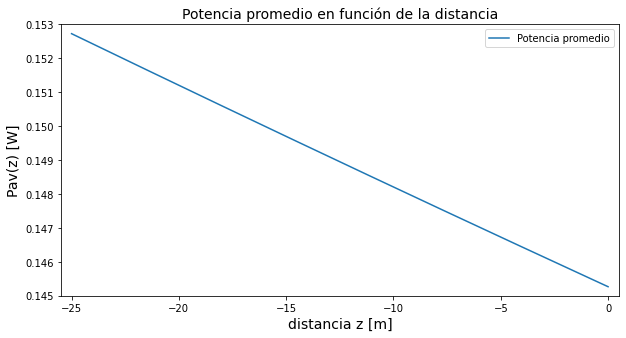

In [3]:
Pav_fuente = 0.5*np.real((np.abs(V_fuente)**2)/Z_fuente)
Pav_z = Pav_fuente*np.exp(-2*(z+25)*alpha)

fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(z, Pav_z, label='Potencia promedio')
ax.axis([-l-0.5, 0.5, 0.145, 0.153 ])
ax.set_xlabel('distancia z [m]', fontsize=14)
ax.set_ylabel('Pav(z) [W]', fontsize=14)
ax.set_title('Potencia promedio en función de la distancia', fontsize=14)
ax.legend()
fig.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

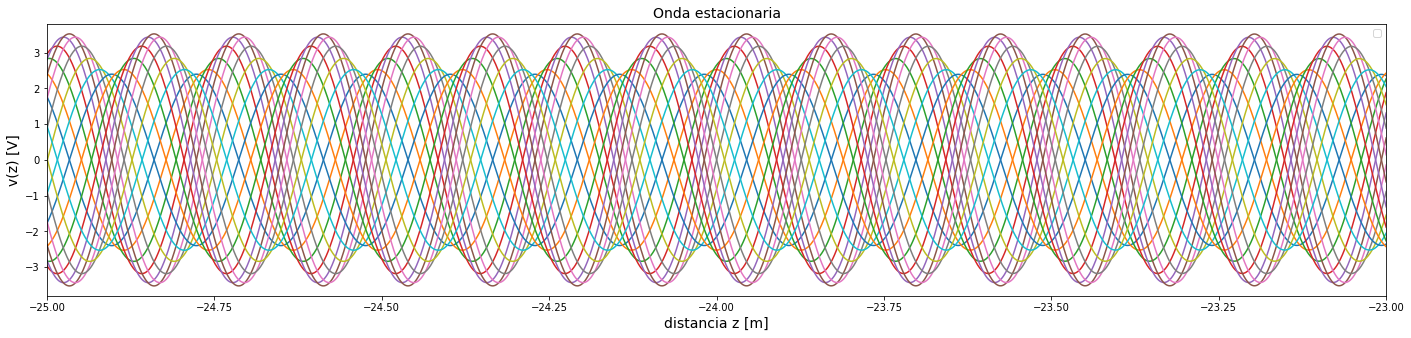

In [4]:
omega = 2*np.pi*f
t = 1/(4*f)
t2 = np.arange(0,4,0.2)

t2 = t2*t

fig, ax = plt.subplots(1, figsize=(24, 5))
for seg in t2:
  Vzt1 = Vo_mas*np.exp(-alpha*z)*np.cos(omega*seg-betha*z)+Vo_menos*np.exp(alpha*z)*np.cos(omega*seg+betha*z)
  ax.plot(z, Vzt1)
ax.axis([-l, -23, -3.8, 3.8 ])
ax.set_xlabel('distancia z [m]', fontsize=14)
ax.set_ylabel('v(z) [V]', fontsize=14)
ax.set_title('Onda estacionaria', fontsize=14)
ax.legend()
fig.show()


In [5]:
print("Coeficiente de reflexión en la carga: ", CR_carga)
print("Coeficiente de reflexión en la fuente: ", CR_fuente)
print("Impedancia en la fuente: ", Z_fuente, " Ω")
print("Voltaje en la fuente: ", V_fuente, " V")
print("Vo+: ", Vo_mas, " V")
ROET = (1+np.abs(CR_carga))/(1-np.abs(CR_carga))
print("ROET: ",ROET)
porcentaje_potencia_reflexion = np.abs(CR_carga)**2
Pav_carga = Pav_fuente*np.exp(-2*l*alpha)
print("Potencia en la carga: ", Pav_carga, " W")
Potencia_reflejada = Pav_carga*porcentaje_potencia_reflexion
Potencia_transferida = Pav_carga-Potencia_reflejada
print("Potencia transferida: ", Potencia_transferida, " W")
print("Potencia reflejada: ", Potencia_reflejada, " W")

Coeficiente de reflexión en la carga:  -0.2
Coeficiente de reflexión en la fuente:  (-0.01825235920482768-0.1893682869566505j)
Impedancia en la fuente:  (67.3866020528972-26.480181138388673j)  Ω
Voltaje en la fuente:  (4.87420165112249-0.048008736076269105j)  V
Vo+:  (2.8879290925047987+3.777334024033421j)  V
ROET:  1.4999999999999998
Potencia en la carga:  0.14526740133286797  W
Potencia transferida:  0.13945670527955326  W
Potencia reflejada:  0.0058106960533147204  W


In [13]:
print(betha, np.abs(CR_carga))

24.85191966359837 0.2
